In [1]:
# Step 1 import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm


from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [2]:
# Step 2 read the csv files and create pandas dataframes
legitimate_df = pd.read_csv("structured_data_legitimate.csv")
phishing_df = pd.read_csv("structured_data_phishing.csv")

In [3]:
# Step 3 combine legitimate and phishing dataframes, and shuffle
df = pd.concat([legitimate_df, phishing_df], axis=0)

df = df.sample(frac=1)

In [4]:
# Step 4 remove'url' and remove duplicates, then we can create X and Y for the models, Supervised Learning
df = df.drop('URL', axis=1)

df = df.drop_duplicates()

X = df.drop('label', axis=1)
Y = df['label']

In [7]:
# Step 5 split data to train and test

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)


In [8]:
# Step 6 create a ML model using sklearn

svm_model = svm.LinearSVC()


In [9]:
# Step 7 train the model
svm_model.fit(x_train, y_train)

C:\Users\adabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [10]:
# Step 8 make some predictions using test data
predictions = svm_model.predict(x_test)

In [11]:
# Step 9 create a confusion matrix and tn, tp, fn , fp
tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=predictions).ravel()

In [12]:
# Step 10 calculate accuracy, precision and recall scores
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)

print("accuracy --> ", accuracy)
print("precision --> ", precision)
print("recall --> ", recall)


accuracy -->  0.9634672866157423
precision -->  0.09615384615384616
recall -->  0.07352941176470588


In [13]:
# K-fold cross validation, and K = 5
K = 5
total = X.shape[0]
index = int(total / K)

In [14]:
# 1
X_1_test = X.iloc[:index]
X_1_train = X.iloc[index:]
Y_1_test = Y.iloc[:index]
Y_1_train = Y.iloc[index:]

In [15]:
# 2
X_2_test = X.iloc[index:index*2]
X_2_train = X.iloc[np.r_[:index, index*2:]]
Y_2_test = Y.iloc[index:index*2]
Y_2_train = Y.iloc[np.r_[:index, index*2:]]

In [16]:
# 3
X_3_test = X.iloc[index*2:index*3]
X_3_train = X.iloc[np.r_[:index*2, index*3:]]
Y_3_test = Y.iloc[index*2:index*3]
Y_3_train = Y.iloc[np.r_[:index*2, index*3:]]

In [17]:

# 4
X_4_test = X.iloc[index*3:index*4]
X_4_train = X.iloc[np.r_[:index*3, index*4:]]
Y_4_test = Y.iloc[index*3:index*4]
Y_4_train = Y.iloc[np.r_[:index*3, index*4:]]

# 5
X_5_test = X.iloc[index*4:]
X_5_train = X.iloc[:index*4]
Y_5_test = Y.iloc[index*4:]
Y_5_train = Y.iloc[:index*4]

In [18]:
# X and Y train and test lists
X_train_list = [X_1_train, X_2_train, X_3_train, X_4_train, X_5_train]
X_test_list = [X_1_test, X_2_test, X_3_test, X_4_test, X_5_test]

Y_train_list = [Y_1_train, Y_2_train, Y_3_train, Y_4_train, Y_5_train]
Y_test_list = [Y_1_test, Y_2_test, Y_3_test, Y_4_test, Y_5_test]

In [23]:
def calculate_measures(TN, TP, FN, FP):
    model_accuracy = (TP + TN) / (TP + TN + FN + FP)
    model_precision = TP / (TP + FP)
    model_recall = TP / (TP + FN)
    return model_accuracy, model_precision, model_recall
svm_accuracy_list, svm_precision_list, svm_recall_list = [], [], []


In [24]:
for i in range(0, K):
 # ----- SUPPORT VECTOR MACHINE ----- #
    svm_model.fit(X_train_list[i], Y_train_list[i])
    svm_predictions = svm_model.predict(X_test_list[i])
    tn, fp, fn, tp = confusion_matrix(y_true=Y_test_list[i], y_pred=svm_predictions).ravel()
    svm_accuracy, svm_precision, svm_recall = calculate_measures(tn, tp, fn, fp)
    svm_accuracy_list.append(svm_accuracy)
    svm_precision_list.append(svm_precision)
    svm_recall_list.append(svm_recall)

C:\Users\adabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.

In [25]:
SVM_accuracy = sum(svm_accuracy_list) / len(svm_accuracy_list)
SVM_precision = sum(svm_precision_list) / len(svm_precision_list)
SVM_recall = sum(svm_recall_list) / len(svm_recall_list)

print("Support Vector Machine accuracy ==> ", SVM_accuracy)
print("Support Vector Machine precision ==> ", SVM_precision)
print("Support Vector Machine recall ==> ", SVM_recall)

Support Vector Machine accuracy ==>  0.8743553350762421
Support Vector Machine precision ==>  0.049378340260970974
Support Vector Machine recall ==>  0.2404221671231701


In [27]:
data = {'accuracy': [ SVM_accuracy],
        'precision': [SVM_precision],
        'recall': [SVM_recall]
        }
index = ['SVM']


In [28]:
df_results = pd.DataFrame(data=data, index=index)


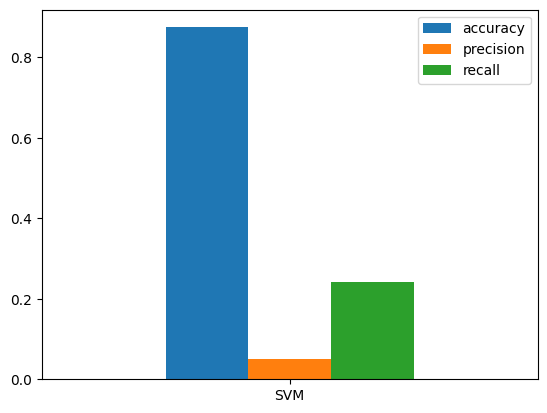

In [29]:

# visualize the dataframe
ax = df_results.plot.bar(rot=0)
plt.show()